
Importing the required python libraries

In [138]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as plotx
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.linear_model import LogisticRegression
from sklearn.semi_supervised import SelfTrainingClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


Importing the dataset to the dataframe
Showing the first ten rows of the datset

In [ ]:
automobile_df= pd.read_csv("/content/imports-85.csv", encoding="latin-1")
automobile_df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,Price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,four,130,mpfi,3.47,2.68,9.0,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,four,130,mpfi,3.47,2.68,9.0,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,six,152,mpfi,2.68,3.47,9.0,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,four,109,mpfi,3.19,3.4,10.0,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,five,136,mpfi,3.19,3.4,8.0,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,five,136,mpfi,3.19,3.4,8.5,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,five,136,mpfi,3.19,3.4,8.5,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,five,136,mpfi,3.19,3.4,8.5,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,five,131,mpfi,3.13,3.4,8.3,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,five,131,mpfi,3.13,3.4,7.0,5500,16,22,26433


Information regarding the dataset


In [ ]:

automobile_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

Evaluation of the null values in the dataset

In [ ]:
automobile_df.isnull().sum()

,0
symboling,0
normalized-losses,0
make,0
fuel-type,0
aspiration,0
num-of-doors,0
body-style,0
drive-wheels,0
engine-location,0
wheel-base,0


Determination of the duplicate values in the dataset

In [ ]:
automobile_df.duplicated().any()

False

Removing the null values

In [ ]:
automobile_df.dropna(inplace=True)

Descriptive statistics of the dataset

In [ ]:
automobile_df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,peak-rpm,city-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


Data Exploration and Visualisation

Distribution of numerical features

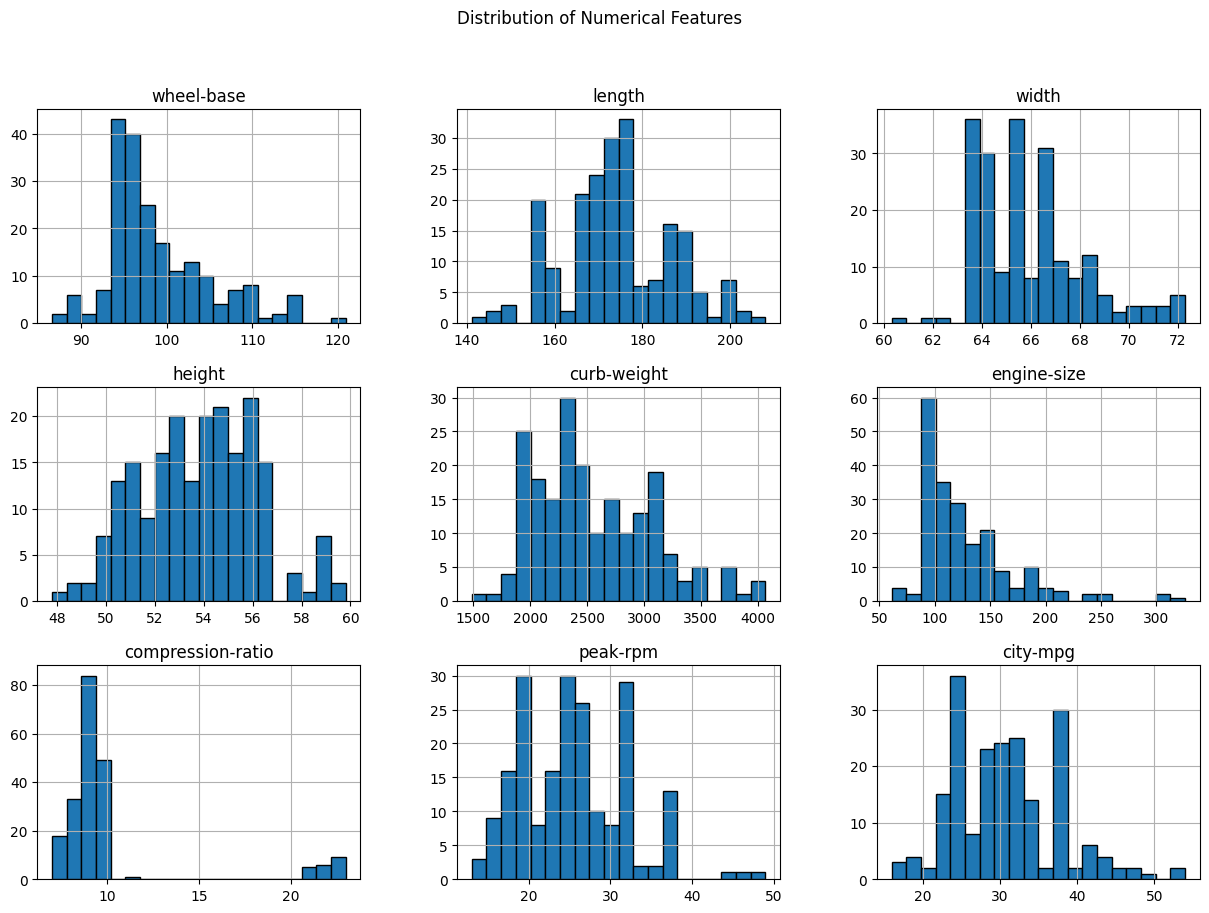

In [ ]:
numerical_features = ['wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'Price']
automobile_df[numerical_features].hist(figsize=(15, 10), bins=20, edgecolor='black')
plt.suptitle('Distribution of Numerical Features')
plt.show()

Count plot of categorical features

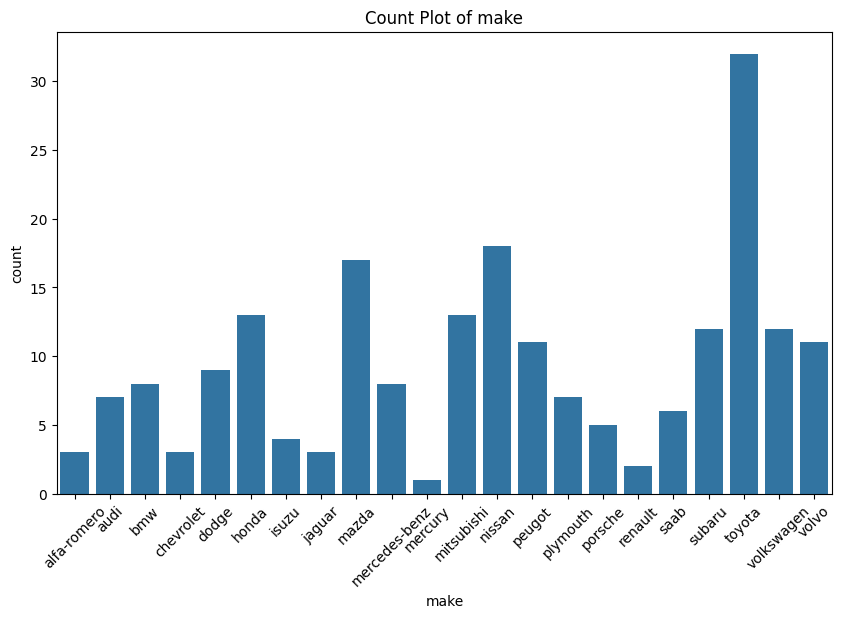

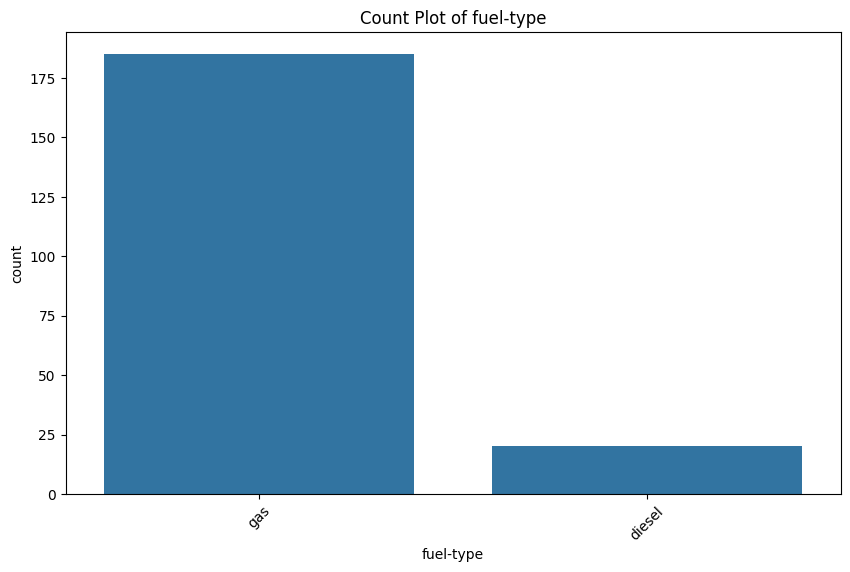

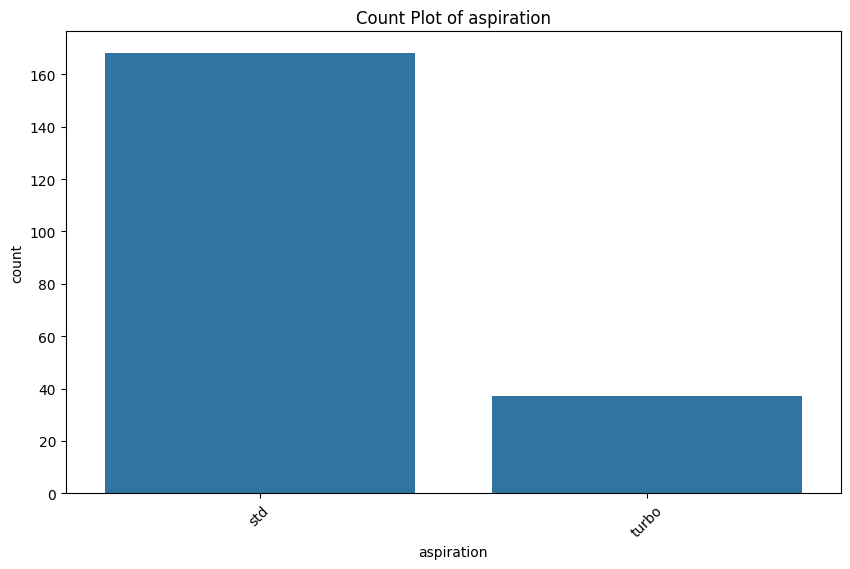

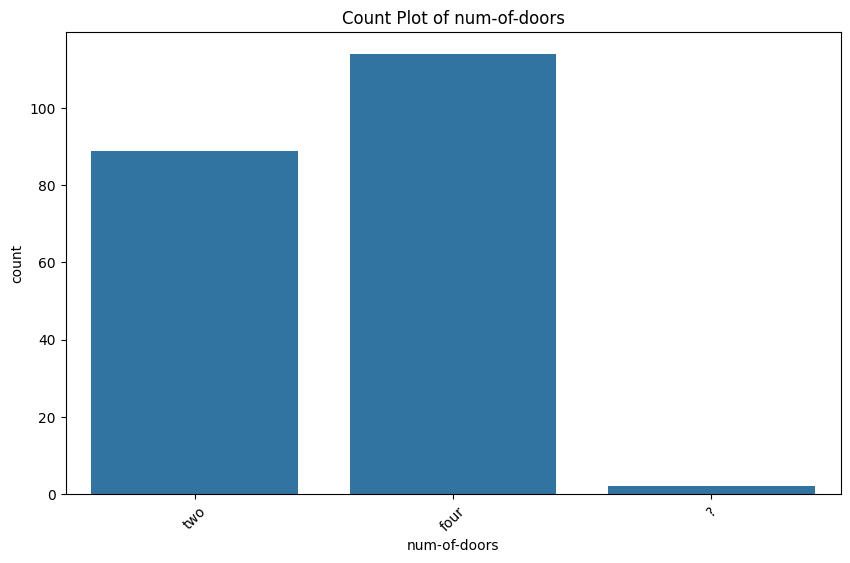

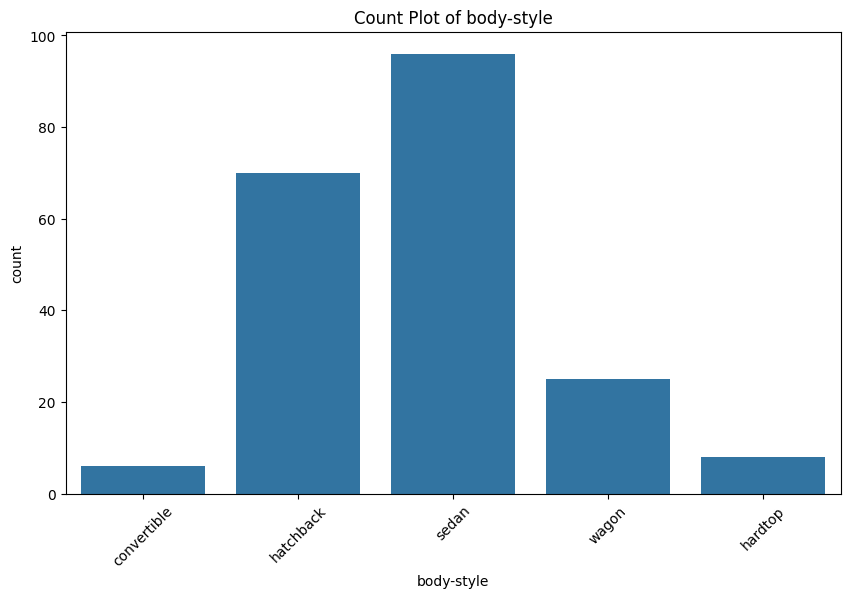

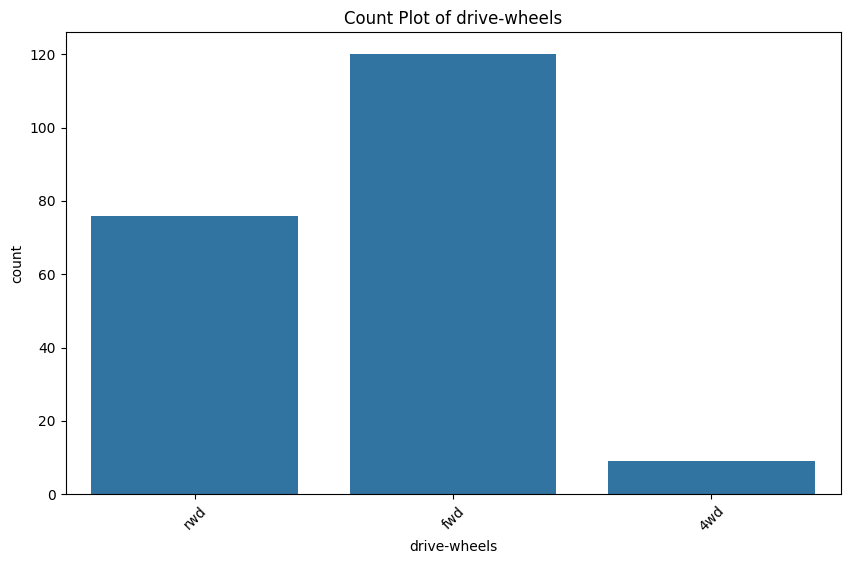

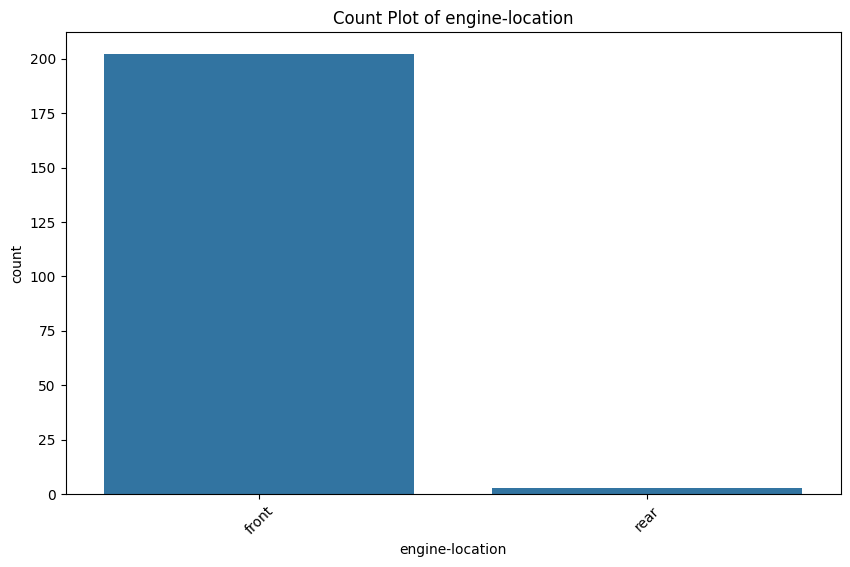

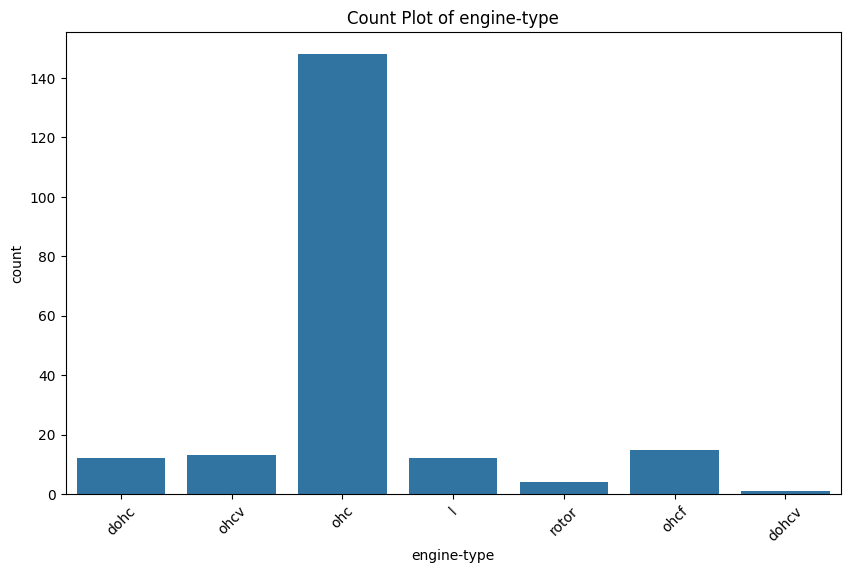

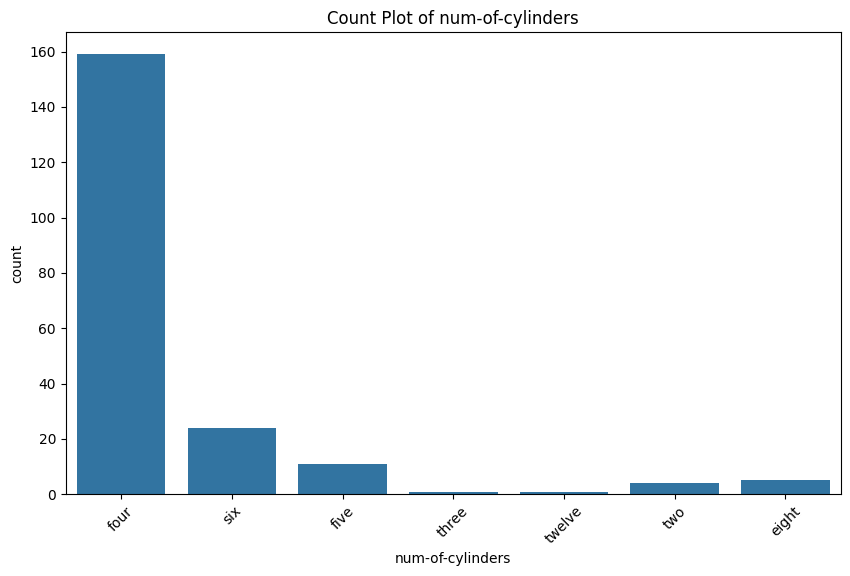

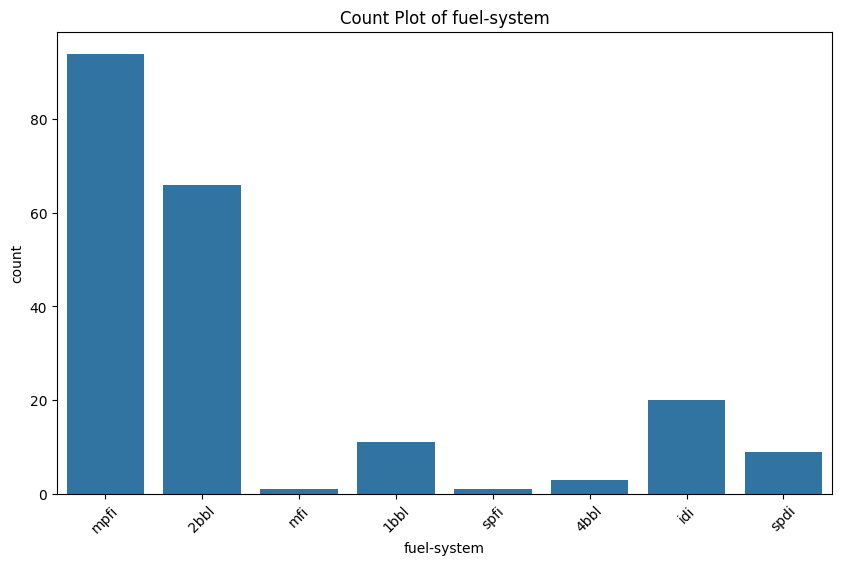

In [ ]:
categorical_features = ['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system']
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=automobile_df, x=feature)
    plt.title(f'Count Plot of {feature}')
    plt.xticks(rotation=45)
    plt.show()

Pairplot of numerical features

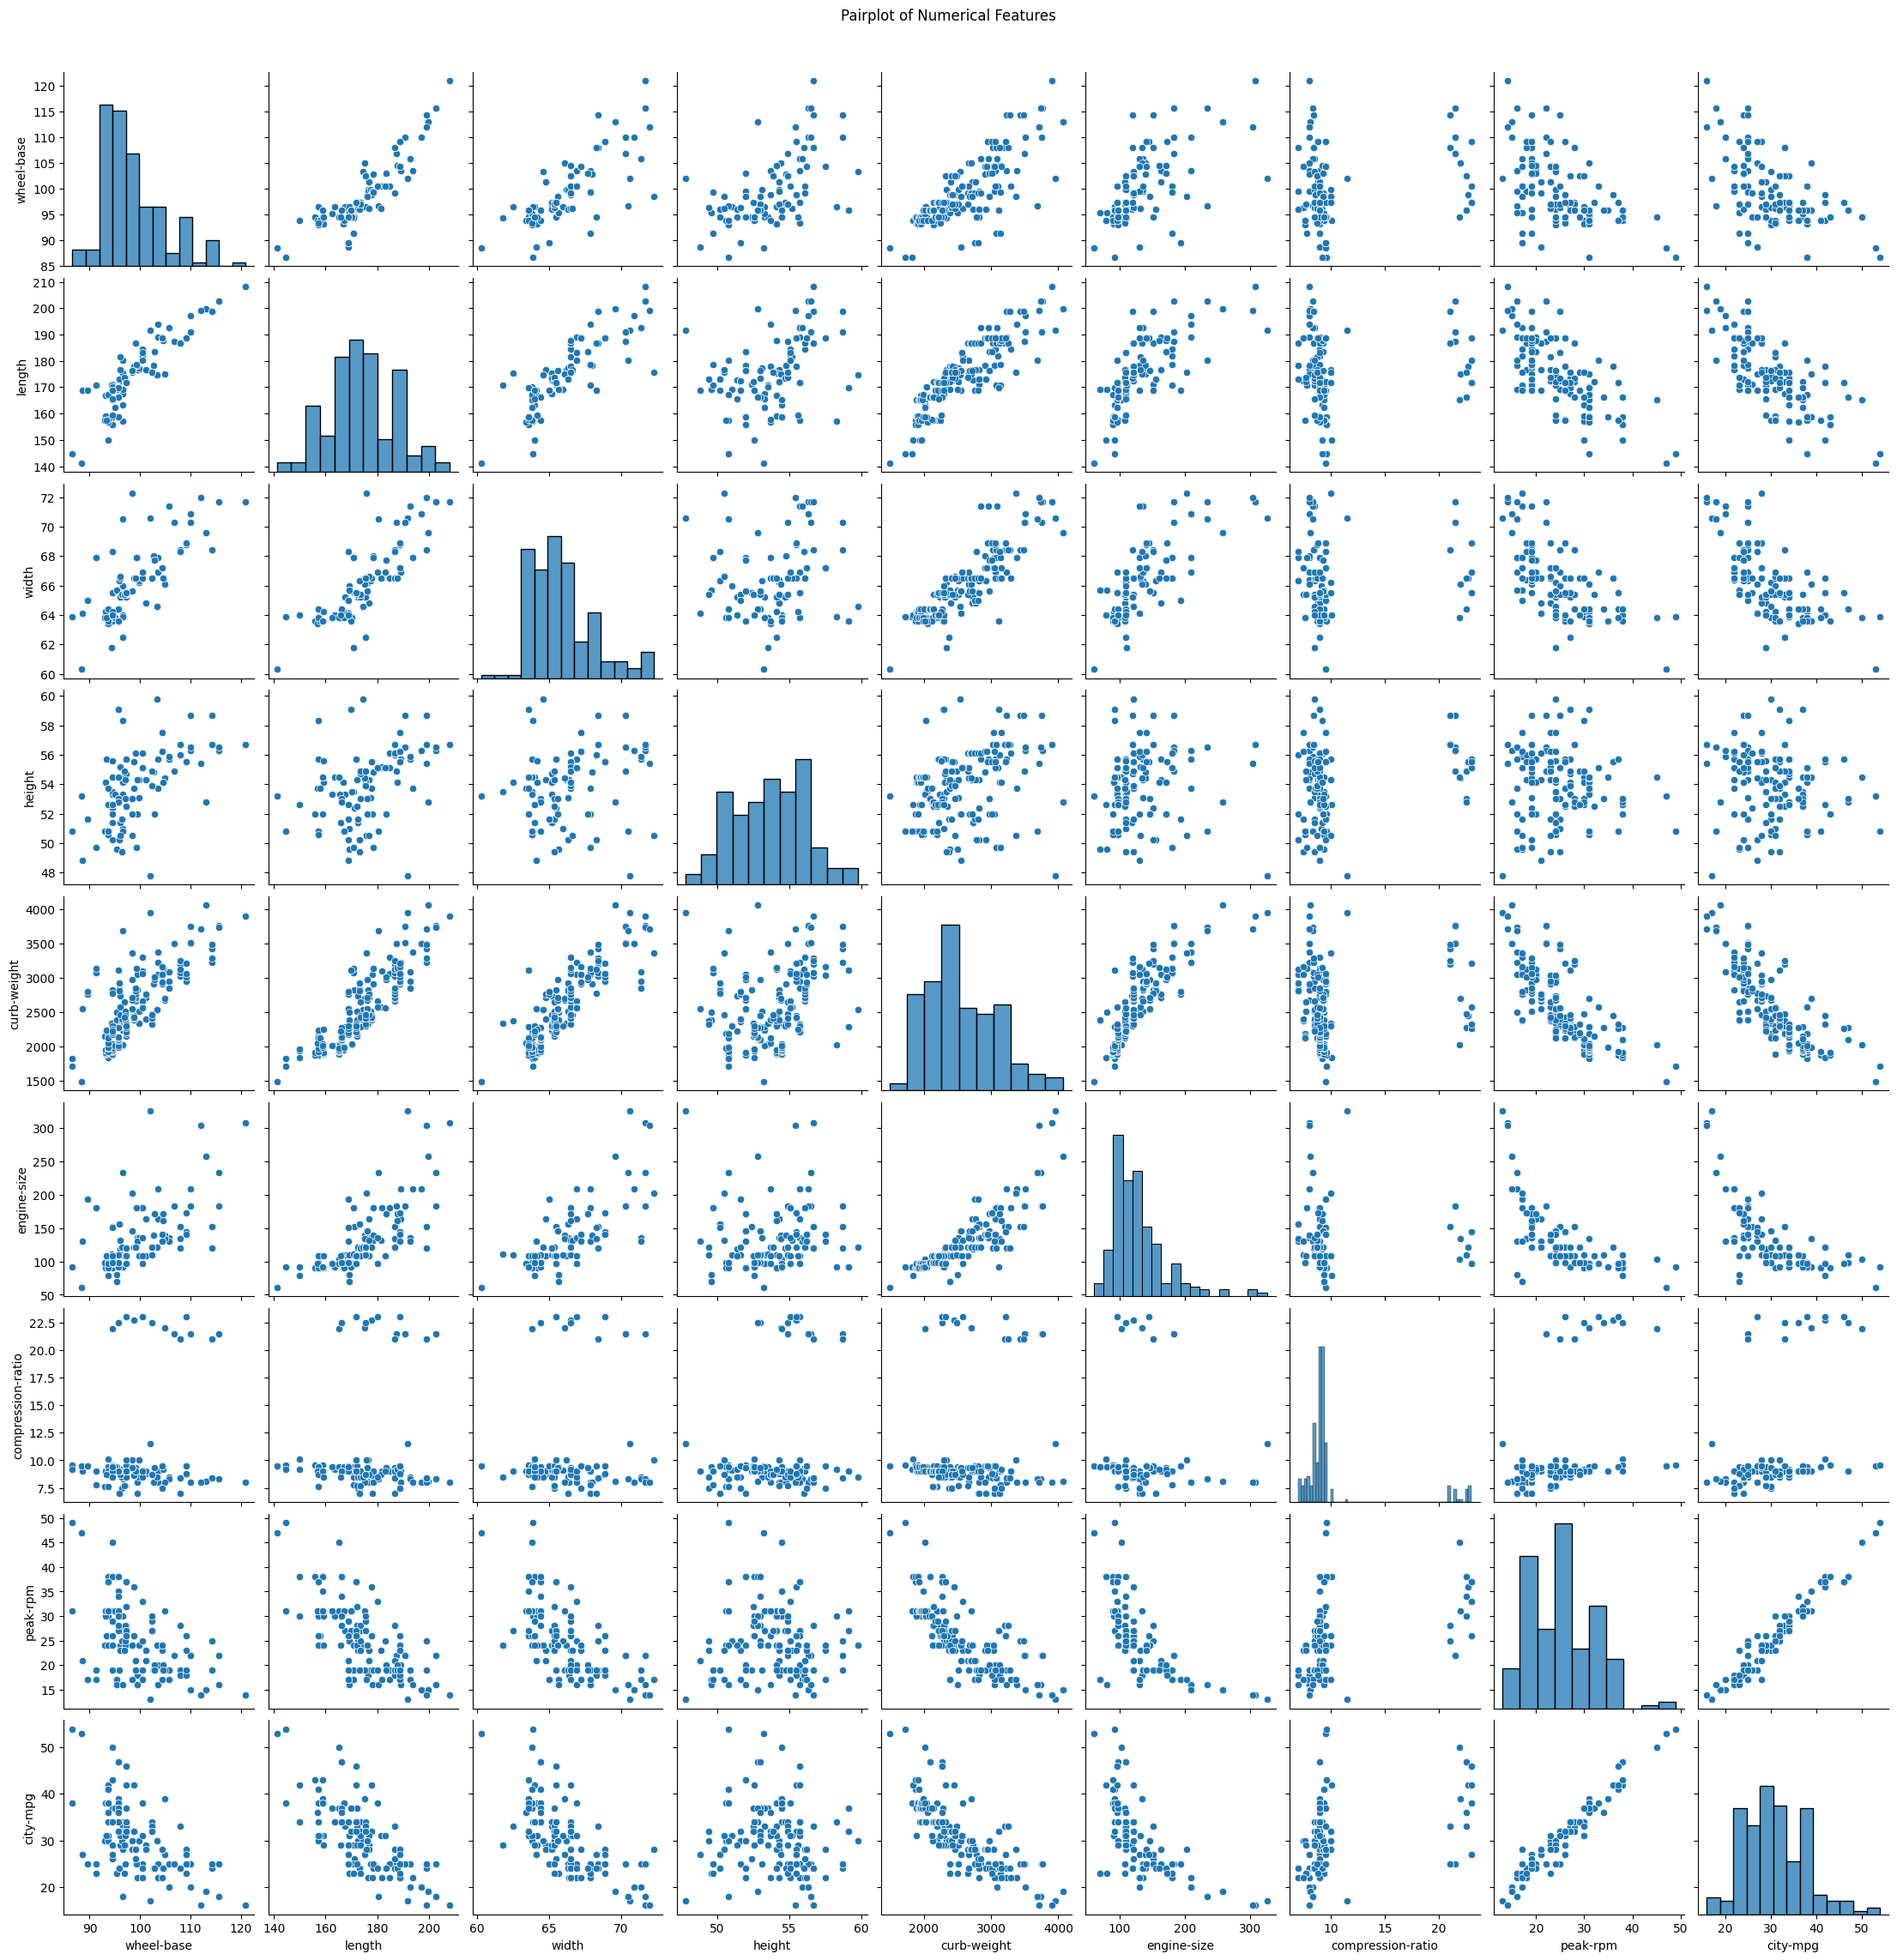

In [ ]:
sns.pairplot(automobile_df[numerical_features])
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()

Check the types of your numerical features

In [ ]:
print(automobile_df[numerical_features].dtypes)


wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-size            int64
compression-ratio    float64
horsepower            object
peak-rpm               int64
city-mpg               int64
Price                 object
dtype: object


Look for any non-numeric values

In [20]:
for column in numerical_features:
    non_numeric = automobile_df[column].apply(lambda x: not isinstance(x, (int, float)))
    if non_numeric.any():
        print(f"Non-numeric values found in column: {column}")
        print(automobile_df[non_numeric][column].unique())

Non-numeric values found in column: horsepower
['5000' '5500' '5800' '4250' '5400' '5100' '4800' '6000' '4750' '4650'
 '4200' '4350' '4500' '5200' '4150' '5600' '5900' '5750' '?' '5250' '4900'
 '4400' '6600' '5300']
Non-numeric values found in column: Price
['13495' '16500' '13950' '17450' '15250' '17710' '18920' '23875' '26433'
 '16430' '16925' '20970' '21105' '24565' '30760' '41315' '36880' '5151'
 '6295' '6575' '5572' '6377' '7957' '6229' '6692' '7609' '8558' '8921'
 '12964' '6479' '6855' '5399' '6529' '7129' '7295' '7895' '9095' '8845'
 '10295' '12945' '10345' '6785' '32456' '23423' '11048' '32250' '35550'
 '36000' '5195' '6095' '6795' '6695' '7395' '10945' '11845' '13645'
 '15645' '8495' '10595' '10245' '10795' '11245' '18280' '18344' '25552'
 '28248' '28176' '31600' '34184' '35056' '40960' '45400' '16503' '5389'
 '6189' '6669' '7689' '9959' '8499' '12629' '14869' '14489' '6989' '8189'
 '9279' '5499' '7099' '6649' '6849' '7349' '7299' '7799' '7499' '7999'
 '8249' '8949' '9549' '13

Convert '?' and other non-numeric values to NaN

In [23]:
automobile_df.replace('?', np.nan, inplace=True)


Convert columns to numeric (forcing errors to NaN)

In [24]:
for column in numerical_features:
    automobile_df[column] = pd.to_numeric(automobile_df[column], errors='coerce')

Drop rows with missing values in the numerical features

In [25]:
automobile_df.dropna(subset=numerical_features, inplace=True)


Or, alternatively, fill missing values with the mean (or another value)

In [26]:
automobile_df[numerical_features] = automobile_df[numerical_features].fillna(automobile_df[numerical_features].mean())


Correlation heatmap

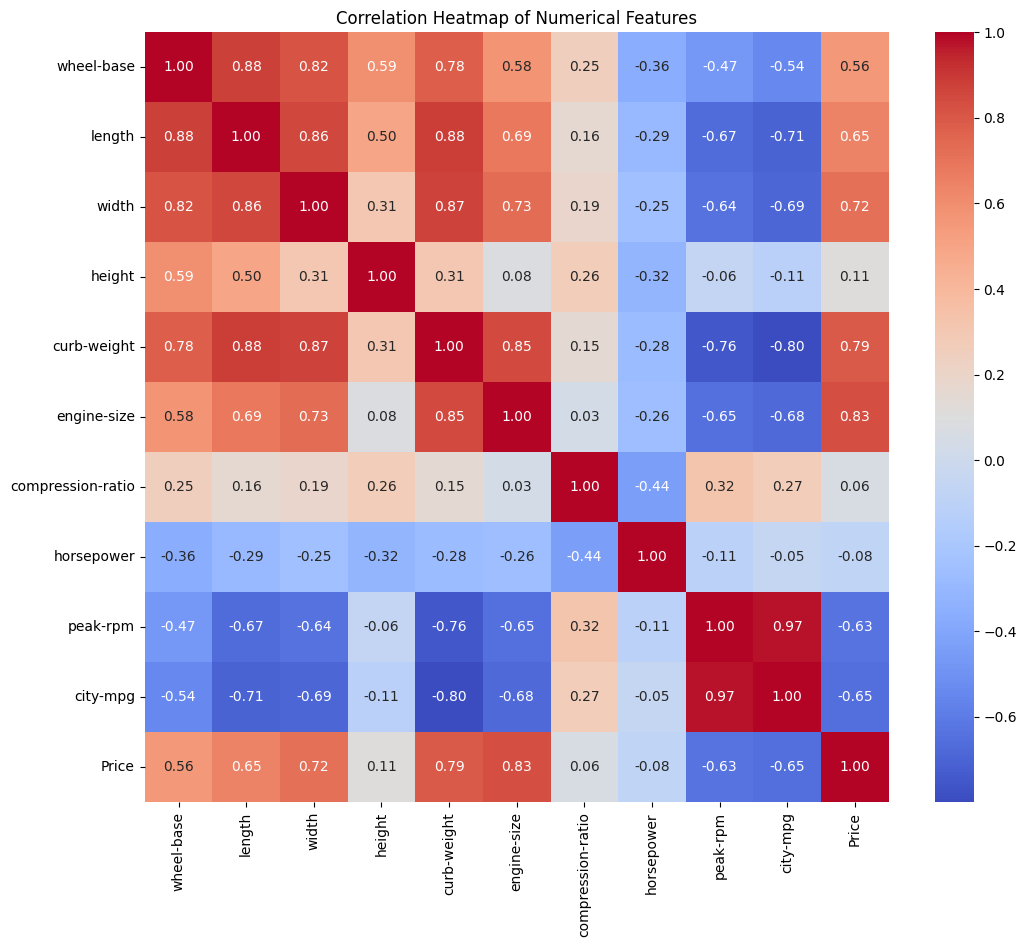

In [27]:
correlation_matrix = automobile_df[numerical_features].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

Scatter plot of engine-size vs. horsepower

In [28]:
plotx.scatter(automobile_df, x='engine-size', y='horsepower', title='Engine Size vs. Horsepower', labels={'engine-size': 'Engine Size', 'horsepower': 'Horsepower'})
plt.show()

Boxplot of city-mpg by body-style

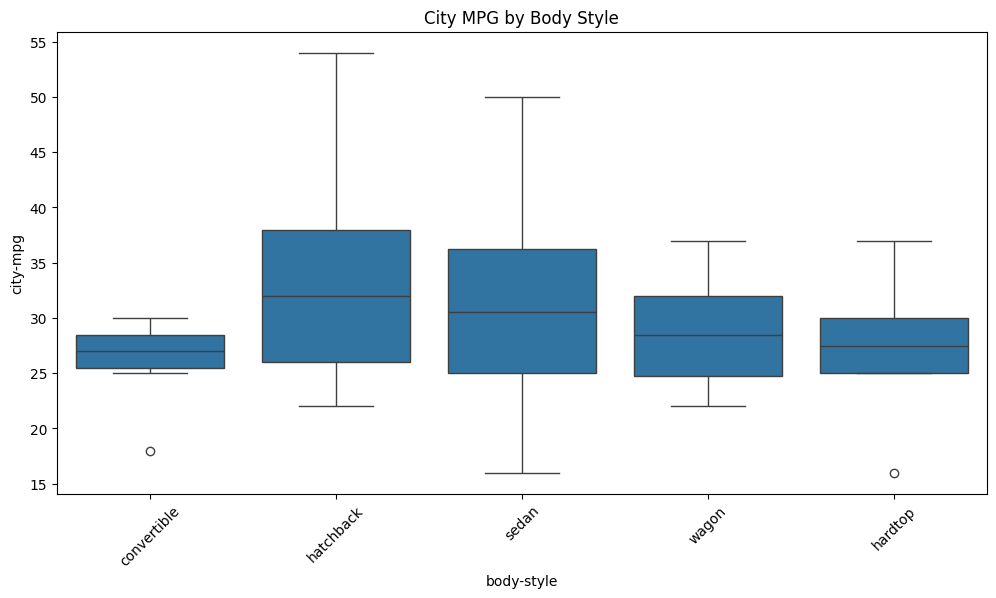

In [29]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=automobile_df, x='body-style', y='city-mpg')
plt.title('City MPG by Body Style')
plt.xticks(rotation=45)
plt.show()

Data Preprocessing

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

Define features and target

In [47]:
features = automobile_df.drop(columns=['make'])
target = automobile_df['make']

Separate numerical and categorical features

In [33]:
numerical_features = automobile_df.select_dtypes(include=['float64', 'int64']).columns
categorical_features = automobile_df.select_dtypes(include=['object']).columns

Numerical features preprocessing

In [34]:
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values
    ('scaler', StandardScaler())  # Feature scaling
])

Categorical features preprocessing

In [35]:
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Handle missing values
    ('encoder', OneHotEncoder(drop='first', sparse=False))  # One-hot encoding
])

Full preprocessing pipeline

In [36]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ]
)

Create transformers for numerical and categorical data

In [41]:
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')


Create a preprocessor that applies the transformers

In [42]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

Fit and transform the features

In [51]:
X = preprocessor.fit_transform(automobile_df)


Preprocess features

# Encode target variable (if it's categorical)


In [52]:
le = LabelEncoder()
y = le.fit_transform(target)

Split the data into training and testing sets

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Output the shapes of the training and testing sets


In [54]:
print(f"Training features shape: {X_train.shape}")
print(f"Testing features shape: {X_test.shape}")
print(f"Training target shape: {y_train.shape}")
print(f"Testing target shape: {y_test.shape}")

Training features shape: (161, 257)
Testing features shape: (41, 257)
Training target shape: (161,)
Testing target shape: (41,)


Supervised Machine Learning Model: Random Forest Classifier

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

Initialize and train the RandomForestClassifier

In [56]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Make predictions

In [143]:
unique_classes_test = set(y_test)
unique_classes_pred = set(y_pred)

print("Unique classes in y_test:", unique_classes_test)
print("Unique classes in y_pred:", unique_classes_pred)

Unique classes in y_test: {1, 2, 3, 5, 6, 8, 9, 10, 11, 12, 13, 15, 17, 18, 19, 20, -1}
Unique classes in y_pred: {0.09375, 1.890625, 2.3125, 0.15625, 0.921875, 4.96875, 2363830863366.875, 8.171875, 9.4375, 8.25, 15.921875, 16.578125, 18.5, 19.921875, 20.828125, 19.546875, 19.421875, 18.46875, 27.234375, 296.828125, 41.140625, 17353977894570.172, 44.96875, 46.328125, -19015315870671.906, 15209722129853.64, -16142975546174.938, -59947574421934.44, -7.265625, -12052777933215.797, 12071453925731.062, 1742408671983.5312, -3091019602577.7344, -3.734375, -11265862797578.797, -10.515625, -8.765625, -7.0625, -6.046875, -43524165841796.02, -3.5625}


In [61]:
print("Number of classes in target_names:", len(le.classes_))
print("Classes in target_names:", le.classes_)

Number of classes in target_names: 21
Classes in target_names: ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'saab' 'subaru' 'toyota' 'volkswagen' 'volvo']


In [62]:
from sklearn.metrics import classification_report


Ensure the labels parameter includes all classes in y_test and y_pred

In [63]:
all_classes = sorted(unique_classes_test.union(unique_classes_pred))
print("All classes:", all_classes)

All classes: [0, 1, 2, 3, 5, 6, 8, 9, 10, 11, 12, 13, 15, 17, 18, 19, 20]


Generate classification report with labels parameter

In [64]:
print("Classification Report:")
print(classification_report(y_test, y_pred, labels=all_classes, target_names=le.classes_))

Classification Report:
               precision    recall  f1-score   support

  alfa-romero       0.00      0.00      0.00         0
         audi       1.00      1.00      1.00         1
          bmw       0.67      1.00      0.80         2
    chevrolet       1.00      1.00      1.00         1
        dodge       1.00      1.00      1.00         1
        honda       1.00      1.00      1.00         1
        isuzu       1.00      1.00      1.00         5
       jaguar       1.00      1.00      1.00         3
        mazda       0.00      0.00      0.00         1
mercedes-benz       1.00      1.00      1.00         5
      mercury       1.00      1.00      1.00         3
   mitsubishi       1.00      1.00      1.00         1
       nissan       1.00      0.50      0.67         2
       peugot       1.00      1.00      1.00         3
     plymouth       1.00      1.00      1.00         8
      porsche       1.00      1.00      1.00         2
         saab       1.00      1.00      1

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2561: UserWarning:

labels size, 17, does not match size of target_names, 21

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:147

Evaluate the model

Confusion Matrix:


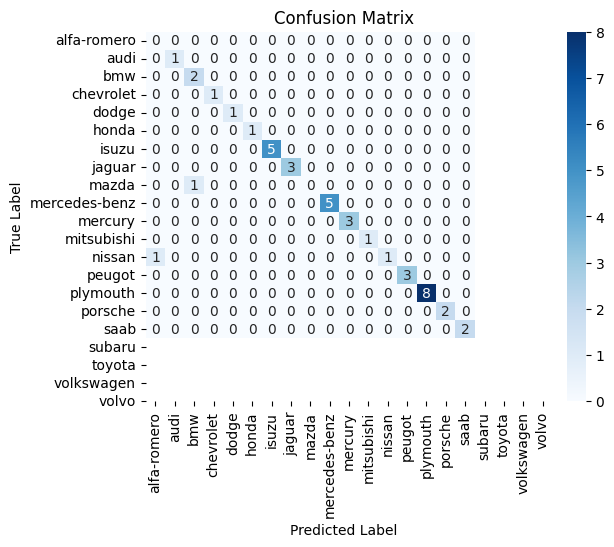

In [66]:
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [139]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [140]:
y_pred = model.predict(X_test)
print("Supervised Learning: Linear Regression Results")
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

Supervised Learning: Linear Regression Results
Mean Squared Error (MSE): 1.7265429247207954e+26
R² Score: -4.37227878345233e+24


Feature Importance

Unsupervised Machine Learning: K-Means Clustering

In [68]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

Preprocess features

In [70]:
X = preprocessor.fit_transform(automobile_df)


Determine optimal number of clusters using the Elbow Method

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



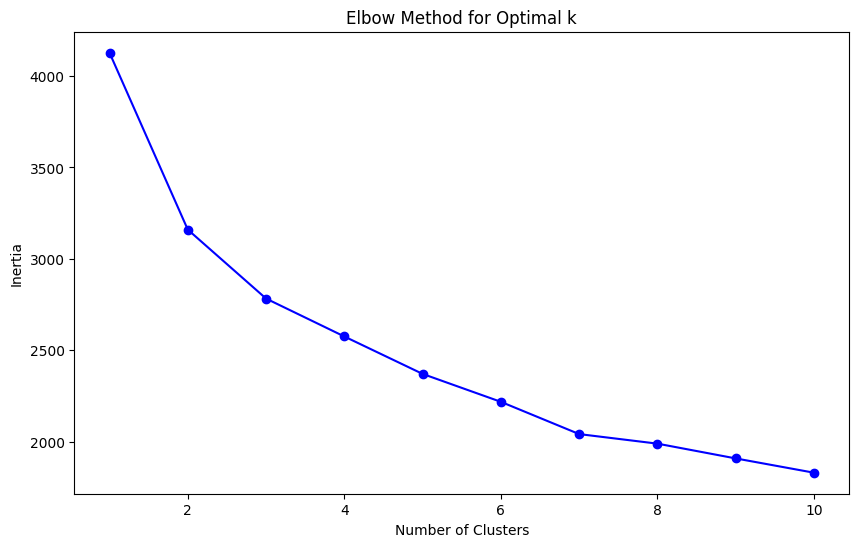

In [71]:
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

Based on the elbow plot, choose the optimal number of clusters (k)

In [72]:
optimal_k = 4

Apply K-Means Clustering

In [73]:
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X)


Add cluster labels to the original dataframe

In [74]:
features['Cluster'] = clusters


In [76]:
silhouette_avg = silhouette_score(X, clusters)
print(f"Silhouette Score: {silhouette_avg:.3f}")

Silhouette Score: 0.190


Display cluster centers

In [77]:
cluster_centers = kmeans.cluster_centers_
print("Cluster Centers (after scaling):")
print(cluster_centers)

Cluster Centers (after scaling):
[[-0.08983762 -0.51069326 -0.64571507 ...  0.01869159  0.
   0.01869159]
 [-0.95309794  1.50067155  1.1034821  ...  0.          0.35714286
   0.        ]
 [-0.74134968  1.17848116  1.22129756 ...  0.          0.04651163
   0.06976744]
 [ 1.44300085 -0.44841876  0.02965706 ...  0.          0.
   0.        ]]


Semi supervised Machine Learning: Self-Training Classifier

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.semi_supervised import SelfTrainingClassifier
from sklearn.metrics import classification_report, confusion_matrix

Full preprocessing pipeline

In [79]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ]
)


Preprocess features

In [89]:
X = preprocessor.fit_transform(automobile_df)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



Encode target variable (if it's categorical)

In [83]:
le = LabelEncoder()
y = le.fit_transform(target)

Introduce unlabeled data by masking some of the target values

In [81]:
import numpy as np

rng = np.random.default_rng(seed=42)
unlabeled_mask = rng.choice([True, False], size=y.shape, p=[0.2, 0.8])
y_unlabeled = np.where(unlabeled_mask, -1, y)

Split the data into training and testing sets

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y_unlabeled, test_size=0.2, random_state=42)


Initialize the base classifier and SelfTrainingClassifier

In [84]:
base_classifier = LogisticRegression(max_iter=1000, random_state=42)
self_training_clf = SelfTrainingClassifier(base_classifier)

Train the Self-Training Classifier

In [85]:
self_training_clf.fit(X_train, y_train)


SelfTrainingClassifier(base_estimator=LogisticRegression(max_iter=1000,
                                                         random_state=42))

Make predictions

In [131]:
y_pred = self_training_clf.predict(X_test)


In [135]:
unique_classes_test = set(y_test[y_test != -1])  # Exclude -1 for unlabeled data
unique_classes_pred = set(y_pred[y_pred != -1])

In [134]:
all_classes = sorted(unique_classes_test.union(unique_classes_pred))
print("All classes:", all_classes)


All classes: [0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 17, 18, 19, 20]


In [133]:
print("Classification Report:")
print(classification_report(y_test, y_pred, labels=all_classes, target_names=le.classes_[:len(all_classes)]))

Classification Report:
               precision    recall  f1-score   support

  alfa-romero       0.00      0.00      0.00         0
         audi       1.00      1.00      1.00         1
          bmw       0.67      1.00      0.80         2
    chevrolet       0.00      0.00      0.00         1
        dodge       0.00      0.00      0.00         0
        honda       1.00      1.00      1.00         1
        isuzu       1.00      1.00      1.00         1
       jaguar       1.00      0.60      0.75         5
        mazda       0.67      1.00      0.80         2
mercedes-benz       0.00      0.00      0.00         1
      mercury       0.67      0.50      0.57         4
   mitsubishi       1.00      1.00      1.00         3
       nissan       1.00      1.00      1.00         1
       peugot       0.00      0.00      0.00         0
     plymouth       0.00      0.00      0.00         2
      porsche       1.00      1.00      1.00         3
         saab       0.73      1.00      0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to cont

Confusion Matrix:


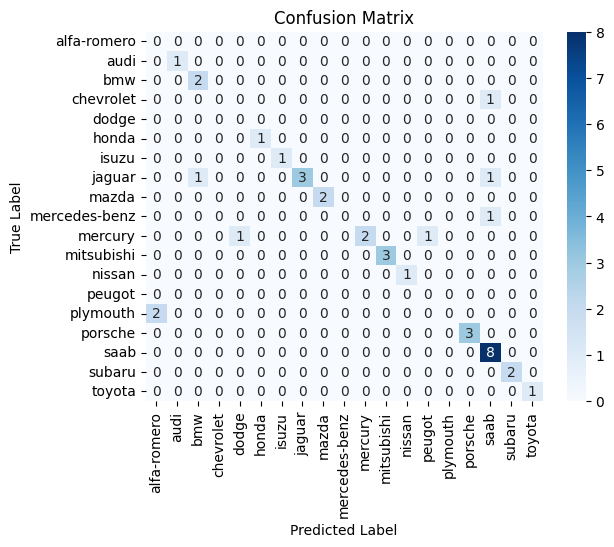

In [132]:



print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred, labels=all_classes)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_[:len(all_classes)], yticklabels=le.classes_[:len(all_classes)])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()